In [1]:
# 라이브러리 불러오기
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep

# 시각화
from matplotlib import font_manager
from matplotlib import rc
import matplotlib.pyplot as plt

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 한글 인코딩
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# 데이터 재정의
df = pd.read_excel('excel/시도별_전출입_인구수.xlsx')
df = df.drop(0, axis='index')

# 전출지별 데이터 체우기
df['전출지별'] = df['전출지별'].ffill()
df = df.rename({'전출지별':'전출지', '전입지별':'전입지'}, axis='columns')
df.head(3)

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271


In [4]:
# 조건문으로 뽑는 방법 (권장)
mask = (df['전출지'] == '서울특별시') & (df['전입지'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지', axis='columns')
df_seoul = df_seoul.set_index('전입지')

df_seoul.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289


In [14]:
# 경기도 
sr1 = df_seoul.loc['경기도']

# 데이터 타입 확인
print('인덱스:', sr1.index[:5])
sr1.values


인덱스: Index(['1970', '1971', '1972', '1973', '1974'], dtype='object')


array([130149, 150313, 93333, 143234, 149045, 253705, 202276, 207722,
       237684, 278411, 297539, 252073, 320174, 400875, 352238, 390265,
       412535, 405220, 415174, 412933, 473889, 384714, 428344, 502584,
       542204, 599411, 520566, 495454, 407050, 471841, 435573, 499575,
       516765, 457656, 400206, 414621, 449632, 431637, 412408, 398282,
       410735, 373771, 354135, 340801, 332785, 359337, 370760, 342433,
       368536, 334293, 375867, 362116, 279731, 279375], dtype=object)

In [16]:
# 데이터 타입 변경
sr1 = sr1.astype(int)
sr1.values

array([130149, 150313,  93333, 143234, 149045, 253705, 202276, 207722,
       237684, 278411, 297539, 252073, 320174, 400875, 352238, 390265,
       412535, 405220, 415174, 412933, 473889, 384714, 428344, 502584,
       542204, 599411, 520566, 495454, 407050, 471841, 435573, 499575,
       516765, 457656, 400206, 414621, 449632, 431637, 412408, 398282,
       410735, 373771, 354135, 340801, 332785, 359337, 370760, 342433,
       368536, 334293, 375867, 362116, 279731, 279375])

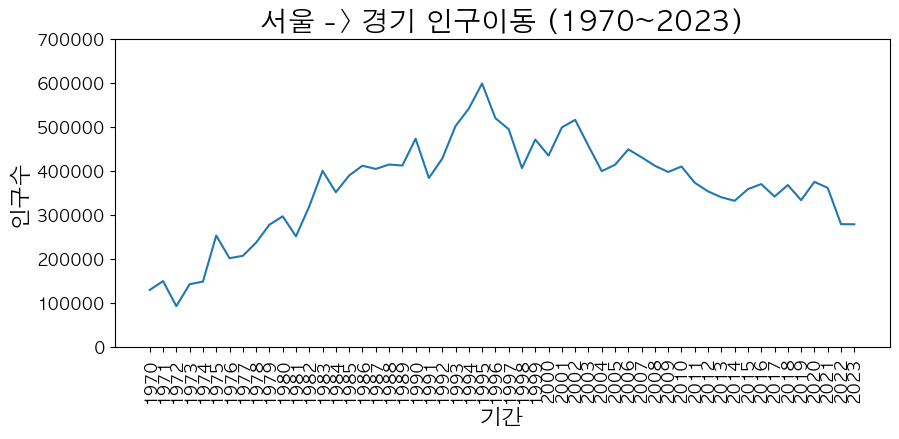

In [31]:
# 1-1. 모형의 크기
plt.figure(figsize=(10,4))

# 1-2. 그래프 그리기
plt.plot(sr1)

# 1-3. 그래프 꾸미기
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.ylim(0, 700000)
plt.xlabel('기간', size=16)
plt.ylabel('인구수', size=16)
plt.title('서울 -> 경기 인구이동 (1970~2023)', size=20)

# 1-4. 출력
# plt.show()
plt.savefig('결과.png')

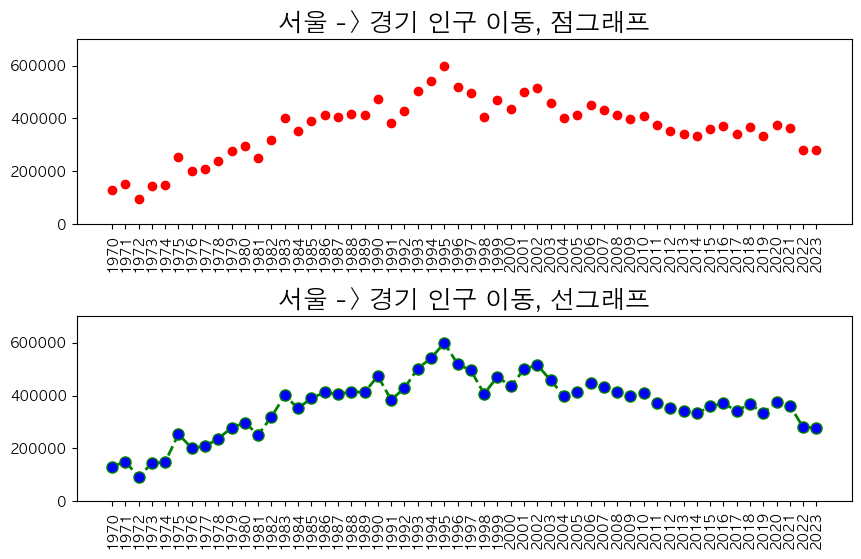

In [49]:
# 2-1. 모형의 크기
figure = plt.figure(figsize=(10,6))

# 2-2. 서브플롯 생성
ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)

# 2-3. 그래프 그리기
ax1.plot(sr1, 'o', color='red')
ax2.plot(sr1, ls='--', linewidth=2, color='green', marker='o', markersize=8, markerfacecolor='blue')

# 2-4. 그래프 꾸미기
figure.subplots_adjust(hspace=0.5)
ax1.set_title('서울 -> 경기 인구 이동, 점그래프', size=18)
ax1.set_ylim(0, 700000)
ax1.set_xticklabels(sr1.index, rotation=90)
ax2.set_title('서울 -> 경기 인구 이동, 선그래프', size=18)
ax2.set_ylim(0, 700000)
ax2.set_xticklabels(sr1.index, rotation=90)

# 2-5. 출력
plt.show()

In [53]:
# 데이터 가공
df4 = df_seoul.loc[['충청남도', '경상북도', '강원특별자치도', '전라남도'], '1980':]
df4.rename({'강원특별자치도':'강원도'}, inplace=True)
df4

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


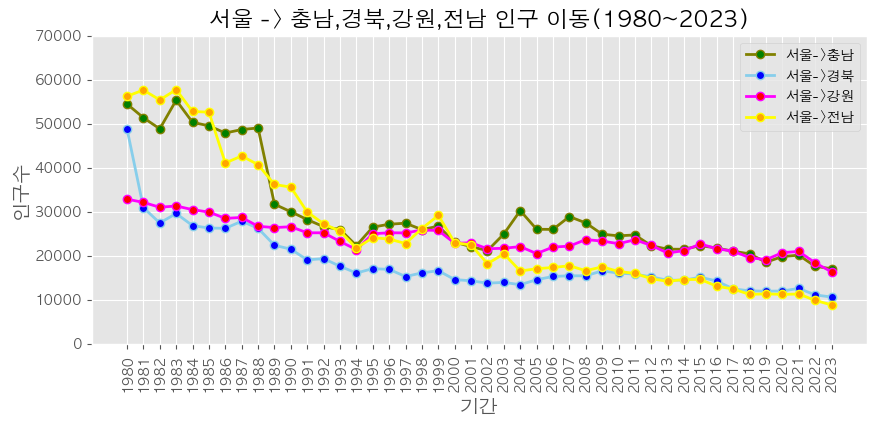

In [80]:
# 스타일
plt.style.use('ggplot')

# 모형 크기
figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(1,1,1)

# 그래프 그리기
ax.plot(df4.loc['충청남도'], marker='o', linewidth=2, markersize=6,
        color='olive', markerfacecolor='green')
ax.plot(df4.loc['경상북도'], marker='o', linewidth=2, markersize=6,
        color='skyblue', markerfacecolor='blue')
ax.plot(df4.loc['강원도'], marker='o', linewidth=2, markersize=6,
        color='magenta', markerfacecolor='red')
ax.plot(df4.loc['전라남도'], marker='o', linewidth=2, markersize=6,
        color='yellow', markerfacecolor='orange')

# 범례
ax.legend(labels=['서울->충남', '서울->경북', '서울->강원', '서울->전남'], loc='best')

# 그래프 꾸미기
ax.set_ylim(0, 70000)
ax.set_xlabel('기간', size=14)
ax.set_ylabel('인구수', size=14)
ax.set_xticklabels(df4.columns, rotation=90)
ax.set_title('서울 -> 충남,경북,강원,전남 인구 이동(1980~2023)', size=16)

plt.show()

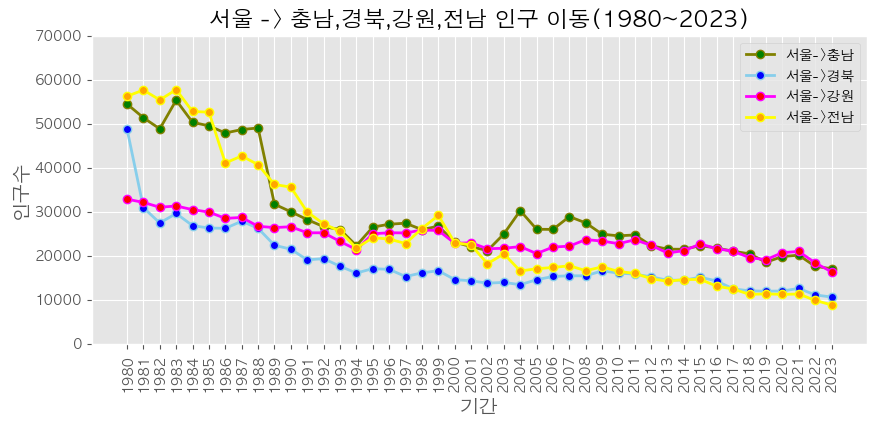

In [88]:
# 메타 데이터
idx_list = ['충청남도', '경상북도', '강원도', '전라남도']
color_list = ['olive', 'skyblue', 'magenta', 'yellow']
face_list = ['green', 'blue', 'red', 'orange']
label_list = ['충남', '경북', '강원', '전남']

# 스타일
plt.style.use('ggplot')

# 모형 크기
figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(1,1,1)

# 그래프 그리기
for idx, color, face, label in zip(idx_list, color_list, face_list, label_list):
        ax.plot(df4.loc[idx], marker='o', linewidth=2, markersize=6,
                color=color, markerfacecolor=face, label=f'서울->{label}')

# 범례
ax.legend(loc='best')

# 그래프 꾸미기
ax.set_ylim(0, 70000)
ax.set_xlabel('기간', size=14)
ax.set_ylabel('인구수', size=14)
ax.set_xticklabels(df4.columns, rotation=90)
title = ','.join(label_list)
ax.set_title(f"서울 -> {title} 인구 이동(1980~2023)", size=16)

plt.show()

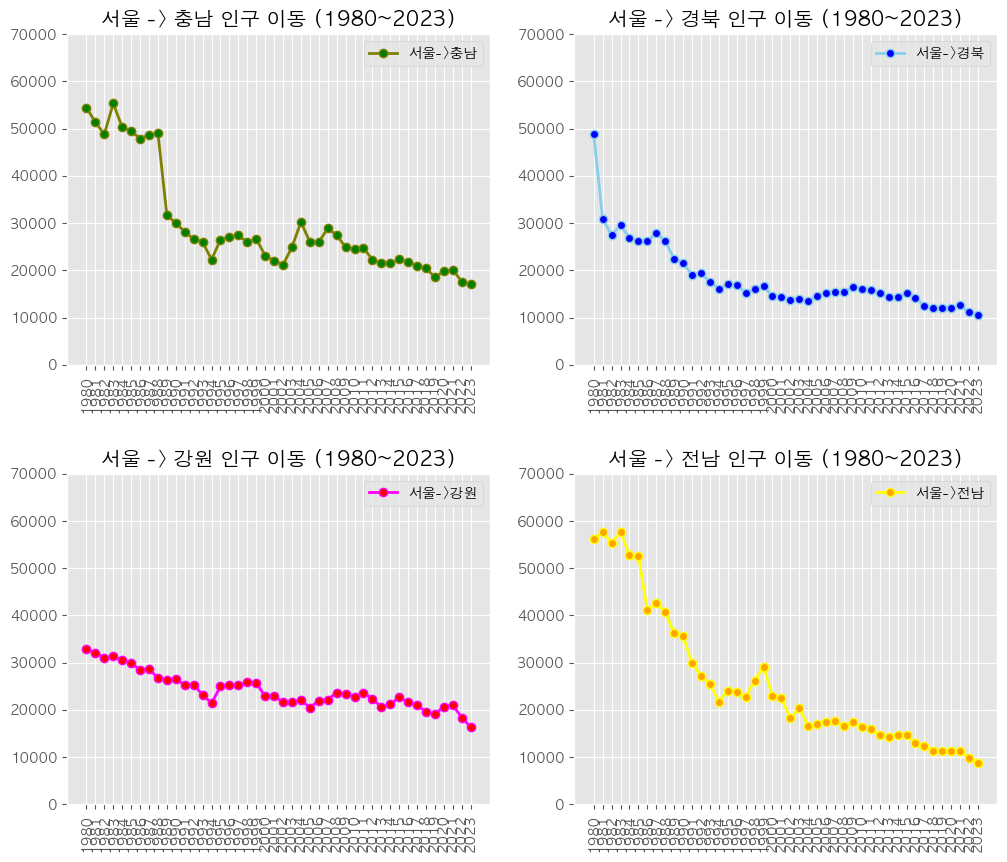

In [112]:
# 메타 데이터
idx_list = ['충청남도', '경상북도', '강원도', '전라남도']
color_list = ['olive', 'skyblue', 'magenta', 'yellow']
face_list = ['green', 'blue', 'red', 'orange']
label_list = ['충남', '경북', '강원', '전남']

# 모형 생성
figure = plt.figure(figsize=(12,10))
figure.subplots_adjust(hspace=0.33)

# 서브플롯 생성
ax_list = []
for n in range(1, 5):
        ax_list.append(figure.add_subplot(2,2,n))
        
# 그래프 생성
for ax, idx, color, face, label in zip(ax_list, idx_list, color_list, face_list, label_list):
        # 그래프 종류
        ax.plot(df4.loc[idx], marker='o', linewidth=2, markersize=6,
                color=color, markerfacecolor=face, label=f'서울->{label}')
        # 그래프 꾸미기
        ax.set_ylim(0, 70000)
        ax.legend(loc='best')
        ax.set_xticklabels(df4.columns, rotation=90)
        # 제목
        title = f'서울 -> {label} 인구 이동 (1980~2023)'
        ax.set_title(title)

# 출력
plt.show()

In [124]:
df5 = df_seoul.loc[['충청남도', '경상북도', '강원특별자치도', '전라남도'], '2013':]
df5.rename({'강원특별자치도':'강원도'}, inplace=True)
df5.columns = df5.columns.map(int)
df5

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,
충청남도,21486,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,14420,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,20601,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,14187,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


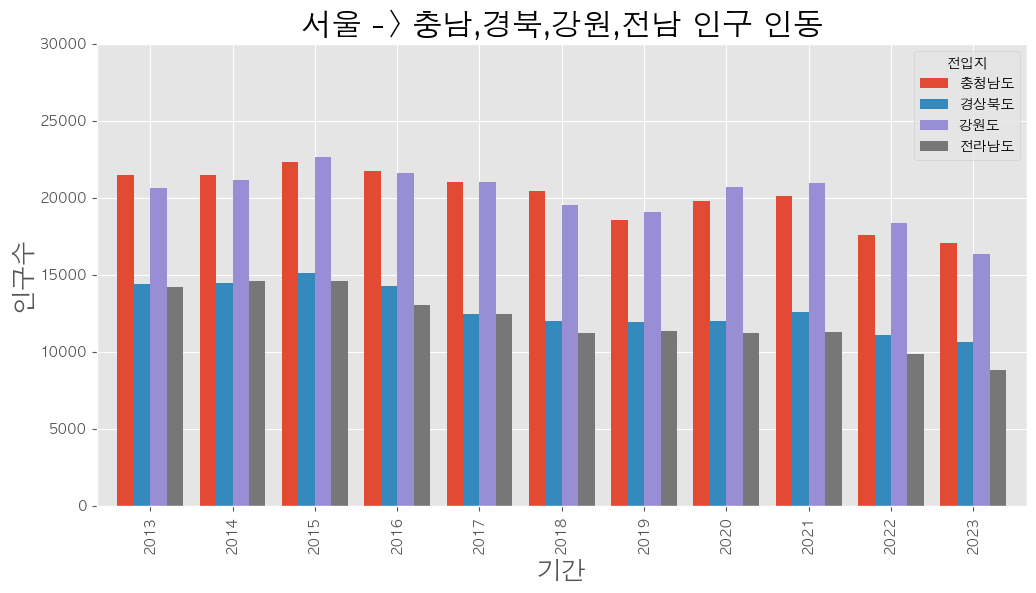

In [156]:
# 메타 데이터
idx_list = ['충청남도', '경상북도', '강원도', '전라남도']

# Pandas는 Matplotlib 의존하고 있음
ax = df5.T.plot(kind='bar', figsize=(12,6), width=0.8)  # pandas
ax.set_title('서울 -> 충남,경북,강원,전남 인구 인동', size=22)  # Matplotlib
ax.set_ylim(0, 30000)
ax.set_xlabel('기간', size=18)
ax.set_ylabel('인구수', size=18)

# # 데이터1
# sr1 = df5.loc['충청남도']
# sr2 = df5.loc['경상북도']
# sr3 = df5.loc['강원도']

# # 모형 생성
# figure = plt.figure(figsize=(10,6))

# # 그래프 생성
# ax = figure.add_subplot(1,1,1)
# ax.bar(height=sr1.values, x=sr1.index + 0.2, width=0.2)
# ax.bar(height=sr2.values, x=sr2.index + 0.0, width=0.2)
# ax.bar(height=sr3.values, x=sr3.index + -0.2, width=0.2)

# # 그래프 꾸미기
# axis_x = [str(year) for year in range(2013, 2024)]
# ax.set_xticklabels(axis_x)

# 출력
plt.show()

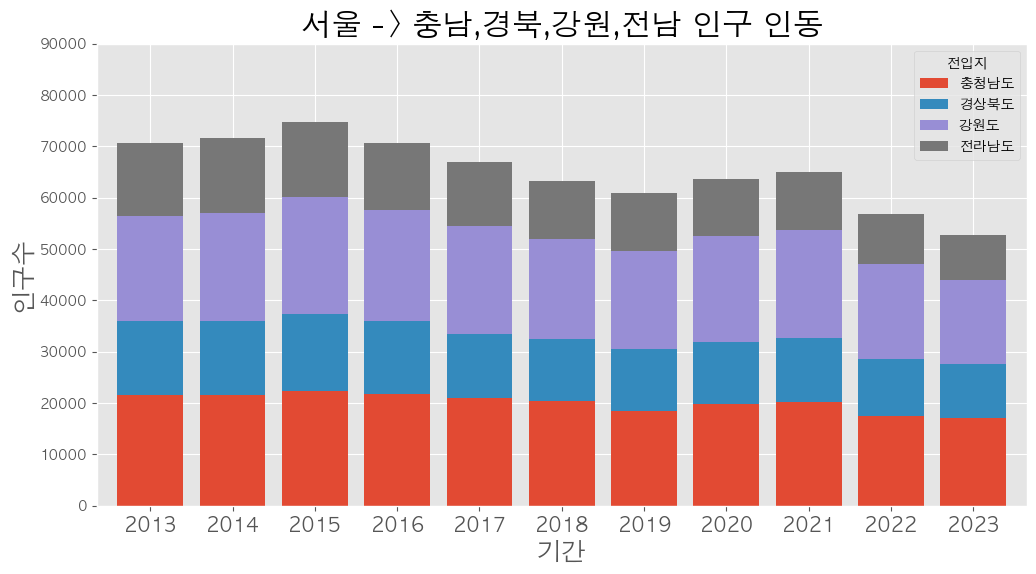

In [168]:
# Pandas -> Matplotlib
ax = df5.T.plot(kind='bar', figsize=(12,6), width=0.8, stacked=True)

# 날짜
year_list = map(str, range(2013, 2024))

# 그래프 꾸미기
ax.set_title('서울 -> 충남,경북,강원,전남 인구 인동', size=22)
ax.set_ylim(0, 90000)
ax.set_xlabel('기간', size=18)
ax.set_ylabel('인구수', size=18)
ax.set_xticklabels(year_list, rotation=0, size=14)

# 출력
plt.show()